In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


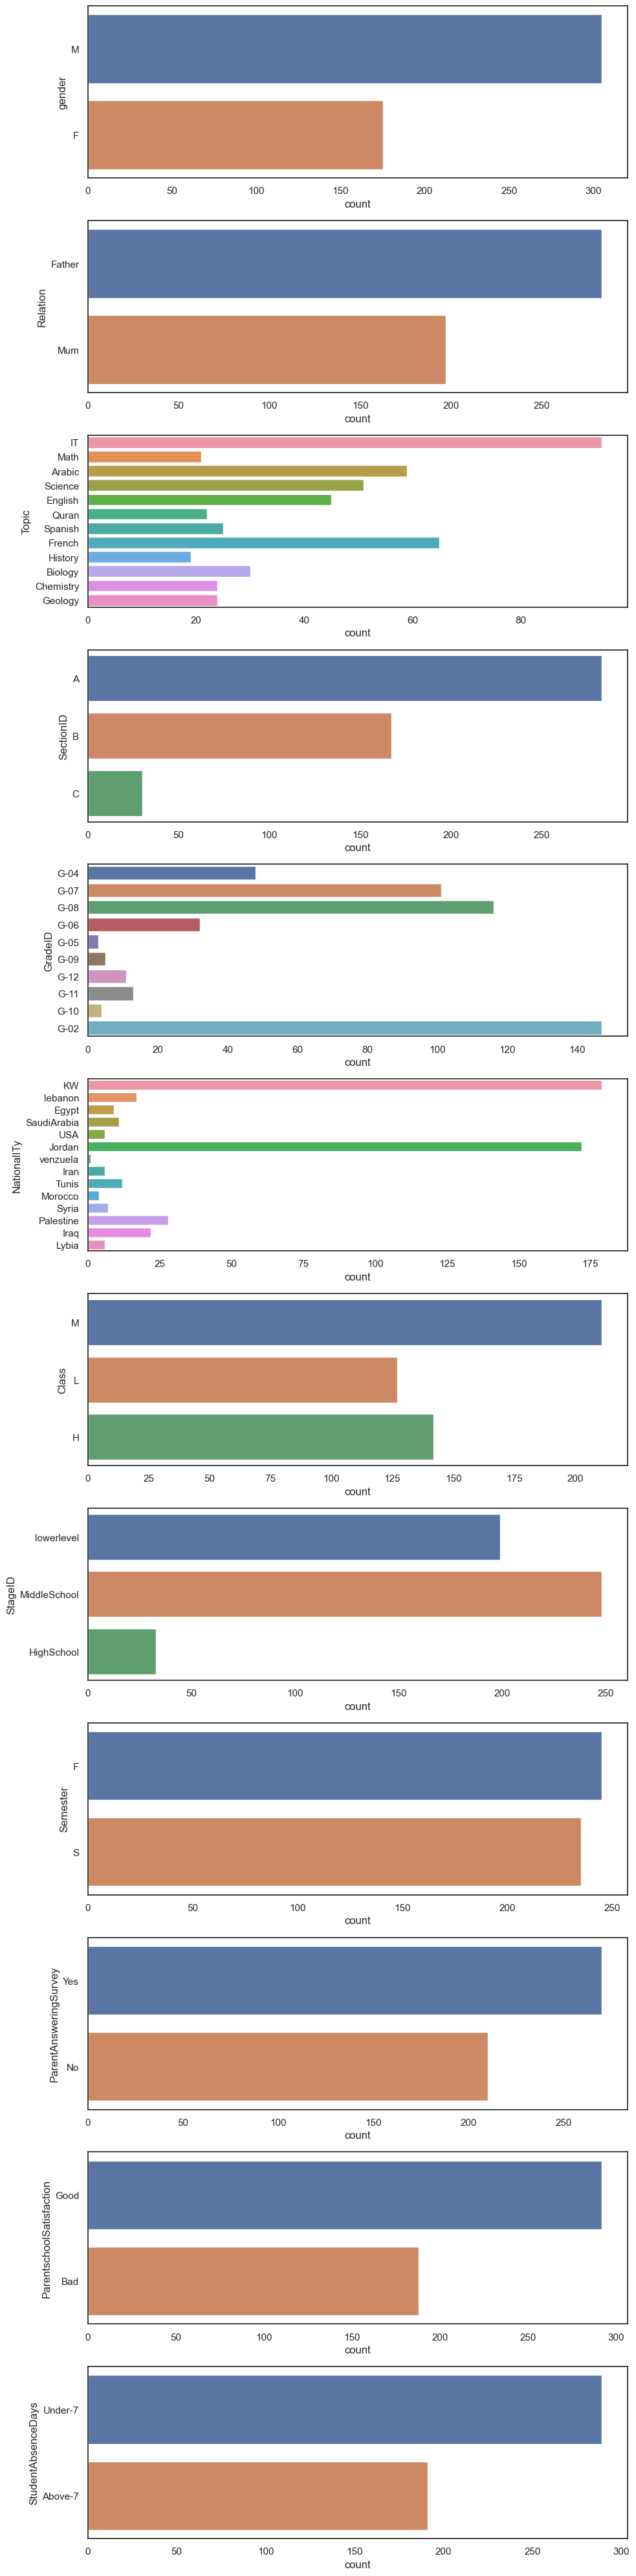

(480, 16)


In [13]:
df = pd.read_csv(r'E:\NUST-dairy\Module\Project\AI-Data.csv')
#print df.shape

df = df.drop(columns='PlaceofBirth')
#print df.head(5)

print(df.describe())

ls = ['gender', 'Relation', 'Topic', 'SectionID', 'GradeID', 'NationalITy', 'Class', 'StageID', 'Semester', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

fig, axes = plt.subplots(nrows=len(ls), figsize=(10, 40))

for i, col in enumerate(ls):
    sns.countplot(y=col, data=df, ax=axes[i])
    axes[i].tick_params(axis='y', labelrotation=0)  # Rotate y-axis labels if necessary

plt.tight_layout()
plt.show()

print(df.shape)

# Preprocessing
target = df.pop('Class')

X = pd.get_dummies(df)

le = LabelEncoder()
y = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)


 1) VisITedResources               0.128494
 2) raisedhands                    0.115890
 3) AnnouncementsView              0.103508
 4) StudentAbsenceDays_Above-7     0.077869
 5) Discussion                     0.074674
 6) StudentAbsenceDays_Under-7     0.072676
 7) Relation_Mum                   0.031380
 8) Relation_Father                0.029454
 9) ParentAnsweringSurvey_No       0.026411
10) ParentAnsweringSurvey_Yes      0.025430
11) gender_F                       0.017401
12) ParentschoolSatisfaction_Bad   0.017162
13) gender_M                       0.016479
14) ParentschoolSatisfaction_Good  0.015377
15) NationalITy_KW                 0.015049
16) NationalITy_Jordan             0.013333
17) SectionID_A                    0.012821
18) SectionID_B                    0.012658
19) Topic_IT                       0.010894
20) StageID_lowerlevel             0.010393
21) StageID_MiddleSchool           0.010272
22) GradeID_G-02                   0.009433
23) Semester_S                  

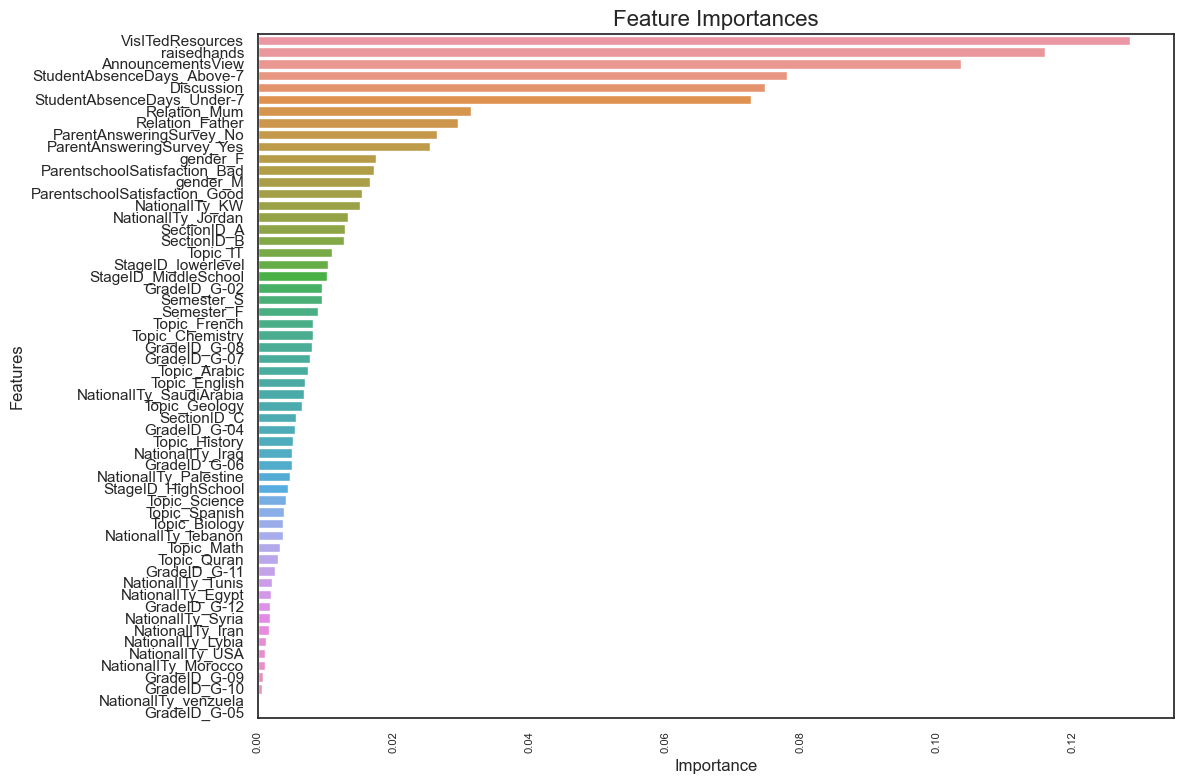

In [14]:
#dimensionality_reduction

feat_labels = X.columns[:58]
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

    
# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=feat_labels[indices])
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.show()


In [15]:
#removing dimensions

X_train_new = X_train
X_test_new = X_test

ls = ['VisITedResources', 'raisedhands', 'AnnouncementsView', 'StudentAbsenceDays_Above-7', 'StudentAbsenceDays_Under-7', 'Discussion']

for i in X_train.columns:
    if i in ls:
        pass
    else:
        X_train_new.drop(i, axis=1, inplace=True)

for i in X_test.columns:
    if i in ls:
        pass
    else:
        X_test_new.drop(i, axis=1, inplace=True)

In [16]:
#spot checking algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train_new, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -0.668780 (0.070306)
LASSO: -0.661345 (0.059540)
EN: -0.663675 (0.063317)
KNN: -0.687148 (0.122429)
CART: -1.148039 (0.230073)
SVR: -0.711740 (0.148054)


ScaledLR: -0.668780 (0.070306)
ScaledLASSO: -0.713360 (0.074043)
ScaledEN: -0.713360 (0.074043)
ScaledKNN: -0.695280 (0.118700)
ScaledCART: -1.165508 (0.281605)
ScaledSVR: -0.687365 (0.125146)


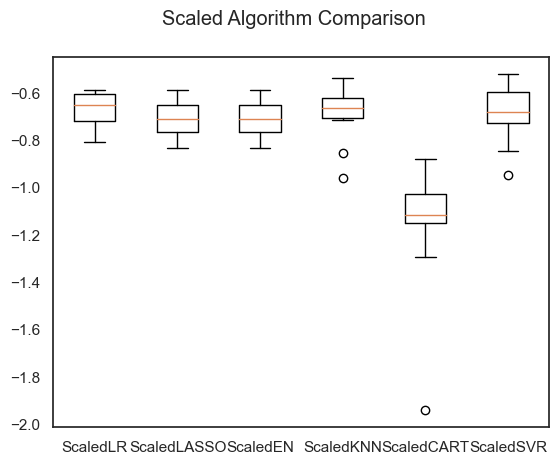

In [17]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train_new, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [18]:
#lasso algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04])
param_grid = dict(alpha=k_values)
model = Lasso()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: -0.663132 using {'alpha': 0.04}
-0.673893 (0.045331) with: {'alpha': 0.1}
-0.675793 (0.045277) with: {'alpha': 0.11}
-0.677836 (0.045130) with: {'alpha': 0.12}
-0.680090 (0.045153) with: {'alpha': 0.13}
-0.682610 (0.045314) with: {'alpha': 0.14}
-0.685481 (0.045699) with: {'alpha': 0.15}
-0.688651 (0.046429) with: {'alpha': 0.16}
-0.672008 (0.045675) with: {'alpha': 0.09}
-0.670047 (0.046416) with: {'alpha': 0.08}
-0.668079 (0.047464) with: {'alpha': 0.07}
-0.666390 (0.048643) with: {'alpha': 0.06}
-0.664865 (0.049878) with: {'alpha': 0.05}
-0.663132 (0.050851) with: {'alpha': 0.04}


In [19]:
# Using ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.657624 (0.105660)
ScaledGBM: -0.671964 (0.144000)
ScaledRF: -0.600088 (0.098538)
ScaledET: -0.614178 (0.118731)


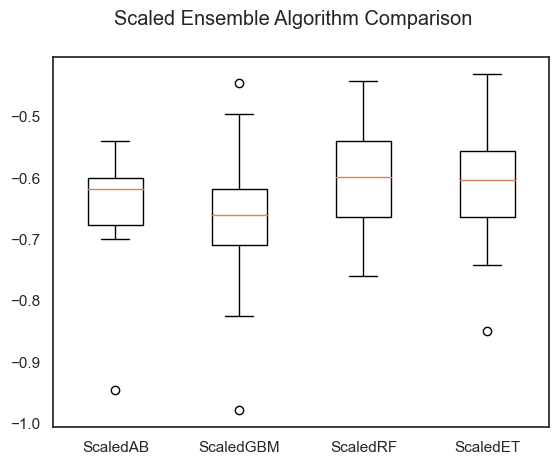

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# Tune scaled AdaboostRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = AdaBoostRegressor(random_state=7)
kfold = KFold(n_splits=10, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.638393 using {'n_estimators': 50}
-0.638393 (0.103713) with: {'n_estimators': 50}
-0.638393 (0.103713) with: {'n_estimators': 100}
-0.638393 (0.103713) with: {'n_estimators': 150}
-0.638393 (0.103713) with: {'n_estimators': 200}
-0.638393 (0.103713) with: {'n_estimators': 250}
-0.638393 (0.103713) with: {'n_estimators': 300}
-0.638393 (0.103713) with: {'n_estimators': 350}
-0.638393 (0.103713) with: {'n_estimators': 400}


In [22]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=7, n_estimators=400)
model.fit(rescaledX, y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

0.7196024872569963
